<h1>3장 Pandas로 데이터 가공하기</h1>

<h2>피벗 테이블</h2>

#### 피벗 테이블 시작

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 피벗 테이블 등장 배경 

In [3]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [4]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### 피벗 테이블 구문

In [5]:
titanic.pivot_table('survived', index = 'sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### 다단계 피벗 테이블

In [7]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [9]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

- 분위 수를 계산

#### 기타 피벗 테이블 옵션 

DataFrame.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name = 'ALL')


aggfunc : 어떤 유형의 집계를 적용할지 제어. 기본값은 평균.

In [14]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [15]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#### 예제: 출생률 데이터 

In [17]:
!curl -0 https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv

year,month,day,gender,births
1969,1,1,F,4046
1969,1,1,M,4440
1969,1,2,F,4454
1969,1,2,M,4548
1969,1,3,F,4548
1969,1,3,M,4994
1969,1,4,F,4440
1969,1,4,M,4520
1969,1,5,F,4192
1969,1,5,M,4198
1969,1,6,F,4710
1969,1,6,M,4850
1969,1,7,F,4646
1969,1,7,M,5092
1969,1,8,F,4800
1969,1,8,M,4934
1969,1,9,F,4592
1969,1,9,M,4842
1969,1,10,F,4852
1969,1,10,M,5190
1969,1,11,F,4580
1969,1,11,M,4598
1969,1,12,F,4126
1969,1,12,M,4324
1969,1,13,F,4758
1969,1,13,M,5076
1969,1,14,F,5070
1969,1,14,M,5296
1969,1,15,F,4798
1969,1,15,M,5096
1969,1,16,F,4790
1969,1,16,M,4872
1969,1,17,F,4944
1969,1,17,M,5030
1969,1,18,F,4670
1969,1,18,M,4642
1969,1,19,F,4170
1969,1,19,M,4452
1969,1,20,F,4884
1969,1,20,M,4924
1969,1,21,F,5042
1969,1,21,M,5432
1969,1,22,F,4796
1969,1,22,M,5088
1969,1,23,F,4794
1969,1,23,M,4660
1969,1,24,F,4752
1969,1,24,M,5046
1969,1,25,F,4348
1969,1,25,M,4674
1969,1,26,F,4230
1969,1,26,M,4338
1969,1,27,F,4864
1969,1,27,M,5046
1969,1,28,F,4860
1969,1,28,M,5172
1969,1,29,F,4500
1969,1,29,M,4880
196

1969,10,18,F,4382
1969,10,18,M,4790
1969,10,19,F,4092
1969,10,19,M,4494
1969,10,20,F,4876
1969,10,20,M,5272
1969,10,21,F,5088
1969,10,21,M,5586
1969,10,22,F,5018
1969,10,22,M,5282
1969,10,23,F,4790
1969,10,23,M,5024
1969,10,24,F,4920
1969,10,24,M,5090
1969,10,25,F,4416
1969,10,25,M,4842
1969,10,26,F,4300
1969,10,26,M,4564
1969,10,27,F,5054
1969,10,27,M,5318
1969,10,28,F,5096
1969,10,28,M,5544
1969,10,29,F,4920
1969,10,29,M,5184
1969,10,30,F,4930
1969,10,30,M,5180
1969,10,31,F,4836
1969,10,31,M,5308
1969,10,99,F,48
1969,10,99,M,48
1969,11,1,F,4676
1969,11,1,M,4666
1969,11,2,F,4376
1969,11,2,M,4528
1969,11,3,F,4952
1969,11,3,M,5386
1969,11,4,F,5114
1969,11,4,M,5658
1969,11,5,F,4832
1969,11,5,M,5188
1969,11,6,F,5090
1969,11,6,M,5150
1969,11,7,F,5172
1969,11,7,M,5488
1969,11,8,F,4726
1969,11,8,M,4952
1969,11,9,F,4342
1969,11,9,M,4680
1969,11,10,F,5024
1969,11,10,M,5318
1969,11,11,F,5252
1969,11,11,M,5626
1969,11,12,F,4862
1969,11,12,M,5462
1969,11,13,F,5028
1969,11,13,M,5072
1969,11,14,F,5

1970,8,20,F,5340
1970,8,20,M,5528
1970,8,21,F,5448
1970,8,21,M,5602
1970,8,22,F,4720
1970,8,22,M,5238
1970,8,23,F,4494
1970,8,23,M,4780
1970,8,24,F,5198
1970,8,24,M,5258
1970,8,25,F,5566
1970,8,25,M,5818
1970,8,26,F,5560
1970,8,26,M,5746
1970,8,27,F,5146
1970,8,27,M,5518
1970,8,28,F,5460
1970,8,28,M,5544
1970,8,29,F,4802
1970,8,29,M,5240
1970,8,30,F,4396
1970,8,30,M,4996
1970,8,31,F,5528
1970,8,31,M,5550
1970,8,99,F,108
1970,8,99,M,104
1970,9,1,F,5506
1970,9,1,M,5844
1970,9,2,F,5256
1970,9,2,M,5680
1970,9,3,F,5366
1970,9,3,M,5722
1970,9,4,F,5574
1970,9,4,M,5792
1970,9,5,F,4982
1970,9,5,M,5234
1970,9,6,F,4542
1970,9,6,M,4944
1970,9,7,F,4658
1970,9,7,M,4906
1970,9,8,F,5444
1970,9,8,M,5866
1970,9,9,F,5740
1970,9,9,M,6120
1970,9,10,F,5540
1970,9,10,M,6114
1970,9,11,F,5640
1970,9,11,M,5952
1970,9,12,F,4960
1970,9,12,M,5258
1970,9,13,F,4750
1970,9,13,M,4794
1970,9,14,F,5432
1970,9,14,M,5872
1970,9,15,F,5806
1970,9,15,M,6098
1970,9,16,F,5558
1970,9,16,M,6146
1970,9,17,F,5636
1970,9,17,M,5836


1971,6,22,F,5026
1971,6,22,M,5096
1971,6,23,F,4602
1971,6,23,M,4998
1971,6,24,F,4740
1971,6,24,M,4944
1971,6,25,F,5024
1971,6,25,M,5262
1971,6,26,F,4316
1971,6,26,M,4620
1971,6,27,F,3950
1971,6,27,M,4100
1971,6,28,F,4840
1971,6,28,M,5146
1971,6,29,F,5000
1971,6,29,M,5132
1971,6,30,F,4960
1971,6,30,M,5166
1971,6,31,M,8
1971,6,99,F,24
1971,6,99,M,12
1971,7,1,F,4906
1971,7,1,M,5224
1971,7,2,F,4812
1971,7,2,M,5202
1971,7,3,F,4308
1971,7,3,M,4388
1971,7,4,F,3898
1971,7,4,M,4228
1971,7,5,F,4154
1971,7,5,M,4492
1971,7,6,F,5058
1971,7,6,M,5122
1971,7,7,F,5172
1971,7,7,M,5370
1971,7,8,F,4982
1971,7,8,M,5194
1971,7,9,F,4948
1971,7,9,M,5548
1971,7,10,F,4396
1971,7,10,M,4764
1971,7,11,F,4116
1971,7,11,M,4358
1971,7,12,F,4710
1971,7,12,M,5218
1971,7,13,F,5008
1971,7,13,M,5498
1971,7,14,F,5090
1971,7,14,M,5404
1971,7,15,F,4900
1971,7,15,M,5164
1971,7,16,F,4990
1971,7,16,M,5560
1971,7,17,F,4488
1971,7,17,M,4936
1971,7,18,F,4142
1971,7,18,M,4466
1971,7,19,F,4828
1971,7,19,M,5146
1971,7,20,F,4996
1971,

1972,9,31,M,2
1972,9,99,F,32
1972,9,99,M,26
1972,10,1,F,3818
1972,10,1,M,4164
1972,10,2,F,4681
1972,10,2,M,4950
1972,10,3,F,4617
1972,10,3,M,4903
1972,10,4,F,4785
1972,10,4,M,4738
1972,10,5,F,4635
1972,10,5,M,4808
1972,10,6,F,4796
1972,10,6,M,4933
1972,10,7,F,4158
1972,10,7,M,4251
1972,10,8,F,3825
1972,10,8,M,4079
1972,10,9,F,4430
1972,10,9,M,4725
1972,10,10,F,4738
1972,10,10,M,5028
1972,10,11,F,4464
1972,10,11,M,4696
1972,10,12,F,4707
1972,10,12,M,4789
1972,10,13,F,4471
1972,10,13,M,4812
1972,10,14,F,4093
1972,10,14,M,4133
1972,10,15,F,3920
1972,10,15,M,3964
1972,10,16,F,4525
1972,10,16,M,4579
1972,10,17,F,4587
1972,10,17,M,4816
1972,10,18,F,4465
1972,10,18,M,4592
1972,10,19,F,4367
1972,10,19,M,4640
1972,10,20,F,4447
1972,10,20,M,4677
1972,10,21,F,3923
1972,10,21,M,4057
1972,10,22,F,3734
1972,10,22,M,3971
1972,10,23,F,4288
1972,10,23,M,4703
1972,10,24,F,4485
1972,10,24,M,4863
1972,10,25,F,4176
1972,10,25,M,4876
1972,10,26,F,4353
1972,10,26,M,4486
1972,10,27,F,4430
1972,10,27,M,4600
19

1974,3,14,F,4172
1974,3,14,M,4230
1974,3,15,F,4297
1974,3,15,M,4593
1974,3,16,F,3843
1974,3,16,M,3991
1974,3,17,F,3518
1974,3,17,M,3708
1974,3,18,F,4120
1974,3,18,M,4574
1974,3,19,F,4335
1974,3,19,M,4643
1974,3,20,F,4034
1974,3,20,M,4421
1974,3,21,F,3920
1974,3,21,M,4480
1974,3,22,F,4194
1974,3,22,M,4474
1974,3,23,F,3820
1974,3,23,M,3953
1974,3,24,F,3484
1974,3,24,M,3550
1974,3,25,F,4172
1974,3,25,M,4398
1974,3,26,F,4283
1974,3,26,M,4473
1974,3,27,F,4061
1974,3,27,M,4454
1974,3,28,F,4139
1974,3,28,M,4322
1974,3,29,F,4245
1974,3,29,M,4394
1974,3,30,F,3624
1974,3,30,M,3902
1974,3,31,F,3538
1974,3,31,M,3767
1974,3,99,F,6
1974,3,99,M,16
1974,4,1,F,4233
1974,4,1,M,4317
1974,4,2,F,4489
1974,4,2,M,4659
1974,4,3,F,4210
1974,4,3,M,4361
1974,4,4,F,4194
1974,4,4,M,4323
1974,4,5,F,4215
1974,4,5,M,4441
1974,4,6,F,3537
1974,4,6,M,3918
1974,4,7,F,3393
1974,4,7,M,3658
1974,4,8,F,4260
1974,4,8,M,4176
1974,4,9,F,4310
1974,4,9,M,4607
1974,4,10,F,3879
1974,4,10,M,4567
1974,4,11,F,4104
1974,4,11,M,4155
197

1979,2,12,M,4933
1979,2,13,F,4725
1979,2,13,M,4938
1979,2,14,F,4872
1979,2,14,M,5166
1979,2,15,F,4709
1979,2,15,M,5016
1979,2,16,F,4782
1979,2,16,M,5041
1979,2,17,F,4172
1979,2,17,M,4244
1979,2,18,F,4043
1979,2,18,M,4152
1979,2,19,F,4525
1979,2,19,M,4754
1979,2,20,F,4962
1979,2,20,M,5090
1979,2,21,F,4764
1979,2,21,M,5012
1979,2,22,F,4701
1979,2,22,M,4996
1979,2,23,F,4891
1979,2,23,M,5209
1979,2,24,F,4153
1979,2,24,M,4472
1979,2,25,F,4050
1979,2,25,M,4209
1979,2,26,F,4627
1979,2,26,M,4940
1979,2,27,F,4849
1979,2,27,M,4902
1979,2,28,F,4740
1979,2,28,M,4922
1979,2,99,F,5
1979,2,99,M,1
1979,3,1,F,4776
1979,3,1,M,5038
1979,3,2,F,4839
1979,3,2,M,4914
1979,3,3,F,4217
1979,3,3,M,4514
1979,3,4,F,3967
1979,3,4,M,4261
1979,3,5,F,4737
1979,3,5,M,4960
1979,3,6,F,4640
1979,3,6,M,5027
1979,3,7,F,4657
1979,3,7,M,4946
1979,3,8,F,4704
1979,3,8,M,5075
1979,3,9,F,4758
1979,3,9,M,5059
1979,3,10,F,4113
1979,3,10,M,4418
1979,3,11,F,3880
1979,3,11,M,4050
1979,3,12,F,4769
1979,3,12,M,4855
1979,3,13,F,4668
1979

1980,6,1,M,4390
1980,6,2,F,4828
1980,6,2,M,5105
1980,6,3,F,4928
1980,6,3,M,5330
1980,6,4,F,4863
1980,6,4,M,5147
1980,6,5,F,4842
1980,6,5,M,5136
1980,6,6,F,4978
1980,6,6,M,5244
1980,6,7,F,4346
1980,6,7,M,4470
1980,6,8,F,3964
1980,6,8,M,4219
1980,6,9,F,4710
1980,6,9,M,4956
1980,6,10,F,5074
1980,6,10,M,5266
1980,6,11,F,4966
1980,6,11,M,5076
1980,6,12,F,4852
1980,6,12,M,5114
1980,6,13,F,4806
1980,6,13,M,5081
1980,6,14,F,4187
1980,6,14,M,4528
1980,6,15,F,4147
1980,6,15,M,4527
1980,6,16,F,5053
1980,6,16,M,5196
1980,6,17,F,4918
1980,6,17,M,5291
1980,6,18,F,5001
1980,6,18,M,5335
1980,6,19,F,4981
1980,6,19,M,5259
1980,6,20,F,5008
1980,6,20,M,5318
1980,6,21,F,4318
1980,6,21,M,4494
1980,6,22,F,4200
1980,6,22,M,4533
1980,6,23,F,5006
1980,6,23,M,5486
1980,6,24,F,5347
1980,6,24,M,5512
1980,6,25,F,5145
1980,6,25,M,5405
1980,6,26,F,5176
1980,6,26,M,5445
1980,6,27,F,5080
1980,6,27,M,5608
1980,6,28,F,4425
1980,6,28,M,4586
1980,6,29,F,4313
1980,6,29,M,4507
1980,6,30,F,5016
1980,6,30,M,5355
1980,6,99,F,1


1981,9,21,M,5694
1981,9,22,F,5570
1981,9,22,M,5918
1981,9,23,F,5467
1981,9,23,M,5814
1981,9,24,F,5558
1981,9,24,M,5643
1981,9,25,F,5626
1981,9,25,M,5834
1981,9,26,F,4855
1981,9,26,M,4848
1981,9,27,F,4583
1981,9,27,M,4754
1981,9,28,F,5577
1981,9,28,M,5764
1981,9,29,F,5368
1981,9,29,M,5706
1981,9,30,F,5401
1981,9,30,M,5591
1981,9,99,F,4
1981,10,1,F,5263
1981,10,1,M,5618
1981,10,2,F,5298
1981,10,2,M,5720
1981,10,3,F,4529
1981,10,3,M,4789
1981,10,4,F,4314
1981,10,4,M,4591
1981,10,5,F,5459
1981,10,5,M,5415
1981,10,6,F,5409
1981,10,6,M,5490
1981,10,7,F,5150
1981,10,7,M,5333
1981,10,8,F,5130
1981,10,8,M,5275
1981,10,9,F,5253
1981,10,9,M,5652
1981,10,10,F,4582
1981,10,10,M,4731
1981,10,11,F,4215
1981,10,11,M,4541
1981,10,12,F,5025
1981,10,12,M,5347
1981,10,13,F,5130
1981,10,13,M,5486
1981,10,14,F,4948
1981,10,14,M,5266
1981,10,15,F,5177
1981,10,15,M,5279
1981,10,16,F,5187
1981,10,16,M,5529
1981,10,17,F,4140
1981,10,17,M,4397
1981,10,18,F,4058
1981,10,18,M,4482
1981,10,19,F,4813
1981,10,19,M,52

1983,1,3,M,4817
1983,1,4,F,4937
1983,1,4,M,5157
1983,1,5,F,4893
1983,1,5,M,5073
1983,1,6,F,4905
1983,1,6,M,5085
1983,1,7,F,4862
1983,1,7,M,5085
1983,1,8,F,4105
1983,1,8,M,4420
1983,1,9,F,4090
1983,1,9,M,4197
1983,1,10,F,4805
1983,1,10,M,5125
1983,1,11,F,4935
1983,1,11,M,5402
1983,1,12,F,4971
1983,1,12,M,5302
1983,1,13,F,4939
1983,1,13,M,5251
1983,1,14,F,5006
1983,1,14,M,5238
1983,1,15,F,4180
1983,1,15,M,4604
1983,1,16,F,4071
1983,1,16,M,4311
1983,1,17,F,5003
1983,1,17,M,5128
1983,1,18,F,5073
1983,1,18,M,5409
1983,1,19,F,4829
1983,1,19,M,5121
1983,1,20,F,4951
1983,1,20,M,5203
1983,1,21,F,5006
1983,1,21,M,5300
1983,1,22,F,4334
1983,1,22,M,4464
1983,1,23,F,4208
1983,1,23,M,4392
1983,1,24,F,4954
1983,1,24,M,5137
1983,1,25,F,5135
1983,1,25,M,5233
1983,1,26,F,4914
1983,1,26,M,5358
1983,1,27,F,5082
1983,1,27,M,5220
1983,1,28,F,4928
1983,1,28,M,5282
1983,1,29,F,4391
1983,1,29,M,4366
1983,1,30,F,4244
1983,1,30,M,4467
1983,1,31,F,5034
1983,1,31,M,5114
1983,1,99,F,5
1983,1,99,M,2
1983,2,1,F,5177


1985,8,14,F,5583
1985,8,14,M,5957
1985,8,15,F,5686
1985,8,15,M,6060
1985,8,16,F,5685
1985,8,16,M,5929
1985,8,17,F,4653
1985,8,17,M,5027
1985,8,18,F,4517
1985,8,18,M,4774
1985,8,19,F,5524
1985,8,19,M,5790
1985,8,20,F,5871
1985,8,20,M,6032
1985,8,21,F,5556
1985,8,21,M,5828
1985,8,22,F,5578
1985,8,22,M,5960
1985,8,23,F,5655
1985,8,23,M,5779
1985,8,24,F,4613
1985,8,24,M,4860
1985,8,25,F,4423
1985,8,25,M,4705
1985,8,26,F,5595
1985,8,26,M,5729
1985,8,27,F,5667
1985,8,27,M,6113
1985,8,28,F,5470
1985,8,28,M,5898
1985,8,29,F,5645
1985,8,29,M,5870
1985,8,30,F,5729
1985,8,30,M,6138
1985,8,31,F,4801
1985,8,31,M,5031
1985,8,99,F,1
1985,9,1,F,4466
1985,9,1,M,4679
1985,9,2,F,4477
1985,9,2,M,4706
1985,9,3,F,5517
1985,9,3,M,5900
1985,9,4,F,5786
1985,9,4,M,6199
1985,9,5,F,5793
1985,9,5,M,6166
1985,9,6,F,5757
1985,9,6,M,6168
1985,9,7,F,4652
1985,9,7,M,4912
1985,9,8,F,4490
1985,9,8,M,4582
1985,9,9,F,5534
1985,9,9,M,6089
1985,9,10,F,5813
1985,9,10,M,6015
1985,9,11,F,5630
1985,9,11,M,5891
1985,9,12,F,5819
1

1986,12,4,M,5344
1986,12,5,F,5068
1986,12,5,M,5373
1986,12,6,F,4019
1986,12,6,M,4276
1986,12,7,F,3946
1986,12,7,M,4141
1986,12,8,F,5157
1986,12,8,M,5289
1986,12,9,F,5368
1986,12,9,M,5595
1986,12,10,F,5176
1986,12,10,M,5443
1986,12,11,F,5124
1986,12,11,M,5279
1986,12,12,F,5245
1986,12,12,M,5433
1986,12,13,F,4187
1986,12,13,M,4315
1986,12,14,F,3970
1986,12,14,M,4110
1986,12,15,F,5249
1986,12,15,M,5617
1986,12,16,F,5575
1986,12,16,M,5814
1986,12,17,F,5534
1986,12,17,M,5683
1986,12,18,F,5435
1986,12,18,M,5752
1986,12,19,F,5686
1986,12,19,M,5942
1986,12,20,F,4337
1986,12,20,M,4351
1986,12,21,F,3971
1986,12,21,M,4175
1986,12,22,F,5152
1986,12,22,M,5437
1986,12,23,F,5174
1986,12,23,M,5359
1986,12,24,F,4457
1986,12,24,M,4640
1986,12,25,F,3861
1986,12,25,M,4246
1986,12,26,F,5112
1986,12,26,M,5305
1986,12,27,F,4371
1986,12,27,M,4450
1986,12,28,F,4072
1986,12,28,M,4214
1986,12,29,F,5532
1986,12,29,M,5766
1986,12,30,F,5900
1986,12,30,M,6337
1986,12,31,F,5490
1986,12,31,M,5898
1986,12,99,M,1
1987,1

1988,3,30,F,5338
1988,3,30,M,5544
1988,3,31,F,5205
1988,3,31,M,5675
1988,3,99,F,1
1988,3,99,M,1
1988,4,1,F,4990
1988,4,1,M,5308
1988,4,2,F,4434
1988,4,2,M,4531
1988,4,3,F,3947
1988,4,3,M,4181
1988,4,4,F,5438
1988,4,4,M,5583
1988,4,5,F,5468
1988,4,5,M,6054
1988,4,6,F,5467
1988,4,6,M,5617
1988,4,7,F,5190
1988,4,7,M,5696
1988,4,8,F,5380
1988,4,8,M,5681
1988,4,9,F,4179
1988,4,9,M,4522
1988,4,10,F,4197
1988,4,10,M,4305
1988,4,11,F,5332
1988,4,11,M,5590
1988,4,12,F,5462
1988,4,12,M,5770
1988,4,13,F,5186
1988,4,13,M,5348
1988,4,14,F,5215
1988,4,14,M,5662
1988,4,15,F,5426
1988,4,15,M,5689
1988,4,16,F,4328
1988,4,16,M,4568
1988,4,17,F,4047
1988,4,17,M,4253
1988,4,18,F,5380
1988,4,18,M,5554
1988,4,19,F,5295
1988,4,19,M,5749
1988,4,20,F,5361
1988,4,20,M,5659
1988,4,21,F,5265
1988,4,21,M,5677
1988,4,22,F,5558
1988,4,22,M,5736
1988,4,23,F,4444
1988,4,23,M,4721
1988,4,24,F,4098
1988,4,24,M,4387
1988,4,25,F,5378
1988,4,25,M,5626
1988,4,26,F,5611
1988,4,26,M,5789
1988,4,27,F,5279
1988,4,27,M,5782
1988

In [18]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv')

In [19]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [20]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns = 'gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


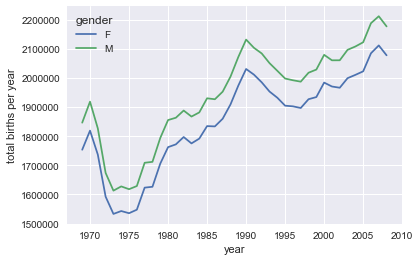

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() 
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('total births per year');

#### 추가 데이터 검색 

In [26]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4383., 4812., 5259.])

In [27]:
mu = quartiles[1]
mu

4812.0

In [28]:
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

648.24

In [32]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [39]:
# 'day'열을 정수형으로 설정; 원래는 널 값 때문에 문자열이었음
births['day'] = births['day'].astype(int)

In [40]:
# 년, 월, 일로부터 날짜 인덱스 생성
births.index = pd.to_datetime(10000 * births.year + 
                              100 * births.month +
                             births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

Text(0,0.5,'mean births by day')

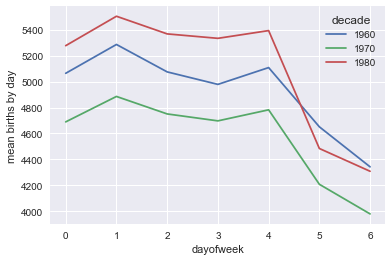

In [42]:
import matplotlib.pylab as plt
import matplotlib as mpl

births.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc = 'mean').plot()
plt.gca().get_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('mean births by day')

In [50]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [51]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index] 

births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


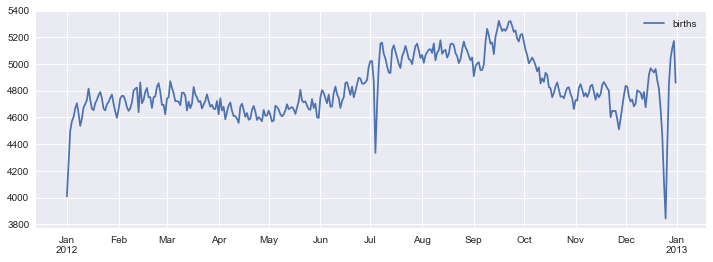

In [54]:
# 결과를 그래프로 그리기 
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax = ax);